* (1)

In [21]:
# (1)
filename='C:\cdata.csv'
linelist=[]
# open the file
myfile=open(filename,'r')
for line in myfile:
    line=line.strip()
    linelist.append(line.split(','))
myfile.close()


In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np
def kmeans(k):
    plt.figure()
    # xx,xy are the list of random centroid
    xx=[]
    xy=[]
    for i in range(k):
        x1=np.random.randn()
        xx.append(x1)
        y1=np.random.randn()
        xy.append(y1)
    # dot 是所有點的list
    # ([第一個centroid],[第二個centroid],[第三個centroid],[第四個centroid])
    # 每個centroid再放[x值, y值]
    dot=[]
    for i in range(k):
        dot.append([[],[]]) 
    for i in range(1,len(linelist)):
        # 比較每個點與四個centroid的距離
        d=[]
        for j in range(k):
            a=((float(linelist[i][0])-xx[j])**2+(float(linelist[i][1])-xy[j])**2)**0.5
            d.append(a)
        # 找到距離最小的centroid，放到dot裡面
        for t in range(k):
            if d.index(min(d))==t:
                dot[t][0].append(float(linelist[i][0]))
                dot[t][1].append(float(linelist[i][1]))
    # 畫散佈圖
    for point in dot[0]:
        Apoint=plt.scatter(dot[0][0],dot[0][1],color='red')
    for point in dot[1]:
        Bpoint=plt.scatter(dot[1][0],dot[1][1],color='green')
    for point in dot[2]:
        Cpoint=plt.scatter(dot[2][0],dot[2][1],color='blue')
    for point in dot[3]:
        Dpoint=plt.scatter(dot[3][0],dot[3][1],color='orange')
    # 調整x的大小顏色
    x=plt.scatter(xx,xy,marker='x',color='black',s=100)
    # 建立標籤
    plt.legend([Apoint,Bpoint,Cpoint,Dpoint,x],['A','B','C','D','Centroid'],loc='upper right')
    # 建立x軸y軸的標示
    plt.xlabel("x")
    plt.ylabel("y")
    # 建立標題
    plt.title('Round 1')
    return xx,xy,dot


In [23]:
def again(xx,xy,dot,k,round):
    new_xx=[]
    new_xy=[]
    # 新的centroid是屬於原centroid的dot的平均中心點
    for j in range(len(dot)):
        s=0
        t=0
        for i in range(len(dot[j][0])):
            s+=dot[j][0][i]
        for r in range(len(dot[j][1])):
            t+=dot[j][1][r]
        # 如果centroid沒有變的話，就維持
        if len(dot[j][0])!=0:
            new_xx.append(s/len(dot[j][0]))
        else:
            new_xx.append(xx[j])
        if len(dot[j][0])!=0:
            new_xy.append(t/len(dot[j][1]))
        else:
            new_xy.append(xy[j])
    new_dot=[]
    # ([第一個centroid],[第二個centroid],[第三個centroid],[第四個centroid])
    # 每個centroid再放[x值, y值]
    for i in range(k):
        new_dot.append([[],[]])
    for cluster in range(k):
        for point in range(len(dot[cluster][0])):
            # 重新比對該點屬於哪一群
            d=[]
            for j in range(k):
                a=((dot[cluster][0][point]-new_xx[j])**2+(dot[cluster][1][point]-new_xy[j])**2)**0.5
                d.append(a)
            for t in range(k):
                if d.index(min(d))==t:
                    new_dot[t][0].append(dot[cluster][0][point])
                    new_dot[t][1].append(dot[cluster][1][point])
    for point in new_dot[0]:
        Apoint=plt.scatter(dot[0][0],dot[0][1],color='red')
    for point in new_dot[1]:
        Bpoint=plt.scatter(dot[1][0],dot[1][1],color='green')
    for point in new_dot[2]:
        Cpoint=plt.scatter(dot[2][0],dot[2][1],color='blue')
    for point in new_dot[3]:
        Dpoint=plt.scatter(dot[3][0],dot[3][1],color='orange')
    x=plt.scatter(new_xx,new_xy,marker='x',color='black',s=100)
    plt.legend([Apoint,Bpoint,Cpoint,Dpoint,x],['A','B','C','D','Centroid'],loc='upper right')
    plt.xlabel("x")
    plt.ylabel("y")
    title='Round'+str(round)
    plt.title(title)
    return new_xx,new_xy,new_dot

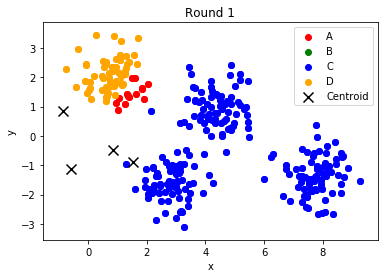

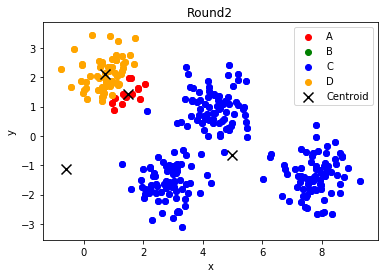

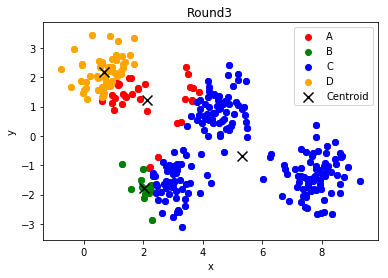

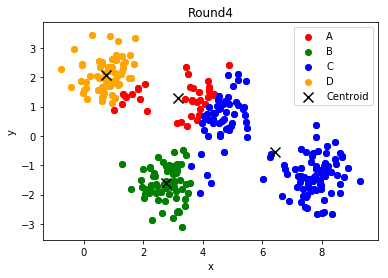

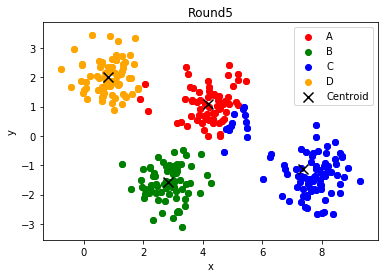

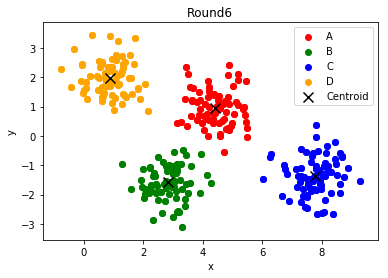

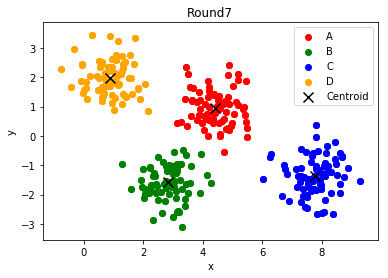

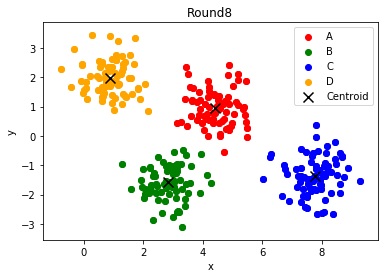

In [24]:
xx,xy,dot=kmeans(4)
go=True
round=2
while go:
    plt.figure()
    new_xx,new_xy,dot=again(xx,xy,dot,4,round)
    # 如果centroid沒有變了就停止
    if new_xx==xx:
        if new_xy==xy:
            go=False
        else:
            xy=new_xy
    else:
        xx=new_xx
    round+=1

* (2)

In [25]:
# k 為群組數
def initial(k):
    plt.figure()
    xx=[]
    xy=[]
    # 先隨機找centroid
    for i in range(k):
        x1=np.random.randn()
        xx.append(x1)
        y1=np.random.randn()
        xy.append(y1)
    dot=[]
    for i in range(k):
        dot.append([[],[]])
    for i in range(1,len(linelist)):
        # 比對各點屬於哪一群組
        d=[]
        for j in range(k):
            a=((float(linelist[i][0])-xx[j])**2+(float(linelist[i][1])-xy[j])**2)**0.5
            d.append(a)
        for t in range(k):
            if d.index(min(d))==t:
                dot[t][0].append(float(linelist[i][0]))
                dot[t][1].append(float(linelist[i][1]))
    return xx,xy,dot

In [26]:
def judge(xx,xy,dot,k):
    # 新的centroid是屬於原centroid的dot的平均中心點
    new_xx=[]
    new_xy=[]
    for j in range(len(dot)):
        s=0
        t=0
        for i in range(len(dot[j][0])):
            s+=dot[j][0][i]
        for r in range(len(dot[j][1])):
            t+=dot[j][1][r]
        if len(dot[j][0])!=0:
            new_xx.append(s/len(dot[j][0]))
        else:
            new_xx.append(xx[j])
        if len(dot[j][0])!=0:
            new_xy.append(t/len(dot[j][1]))
        else:
            new_xy.append(xy[j])
    new_dot=[]
    for i in range(k):
        new_dot.append([[],[]])
    for cluster in range(k):
        for point in range(len(dot[cluster][0])):
            # 比對各點屬於哪一群組   
            d=[]
            for j in range(k):
                a=((dot[cluster][0][point]-new_xx[j])**2+(dot[cluster][1][point]-new_xy[j])**2)**0.5
                d.append(a)
            for t in range(k):
                if d.index(min(d))==t:
                    new_dot[t][0].append(dot[cluster][0][point])
                    new_dot[t][1].append(dot[cluster][1][point])
    return new_xx,new_xy,new_dot

C:\Users\vivi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


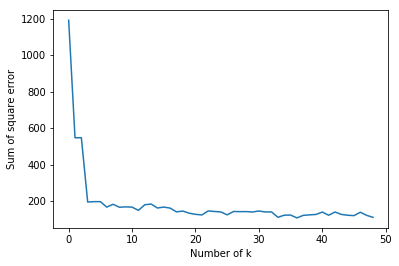

In [27]:
sse=[] # 最小平方差之和
for k in range(2,51):
    xx,xy,dot=initial(k)
    go=True
    while go:
        new_xx,new_xy,dot=judge(xx,xy,dot,k)
        if new_xx==xx:
            if new_xy==xy:
                go=False
            else:
                xy=new_xy
        else:
            xx=new_xx
    # (每個點的x值-centroid的x值)**2+(每個點的y值-centroid的y值)**2的和
    s=0
    for i in range(k):
        for j in range(len(dot[i][0])):
            s+=(dot[i][0][j]-new_xx[i])**2+(dot[i][1][j]-new_xy[i])**2
    sse.append(s)
plt.xlabel('Number of k')
plt.ylabel('Sum of square error')
plt.plot(sse)


* (3)

(110, 220)

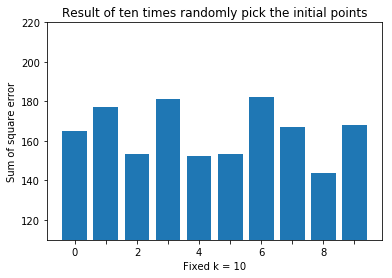

In [33]:
sse=[] # 最小平方差的和
k=10
x=[] # x軸的數值
# 測10次
for time in range(10): 
    xx,xy,dot=initial(k)   
    go=True
    while go:
        new_xx,new_xy,dot=judge(xx,xy,dot,k)
        if new_xx==xx:
            if new_xy==xy:
                go=False
            else:
                xy=new_xy
        else:
            xx=new_xx
    s=0
    for i in range(k):
        for j in range(len(dot[i][0])):
            s+=(dot[i][0][j]-new_xx[i])**2+(dot[i][1][j]-new_xy[i])**2
    sse.append(s)
    x.append(time)

plt.xlabel('Fixed k = 10')
plt.ylabel('Sum of square error') 
plt.title('Result of ten times randomly pick the initial points')
plt.bar(x,sse)

plt.xticks(x,('0',' ','2',' ','4',' ','6',' ','8',' '))
plt.ylim((110,220))